# Imports & globals

In [1]:
import sys
sys.path.append("/home/cbarkhof/fall-2021")

In [2]:
from analysis_run_postprocessing.general_postprocessing_steps import *

%config InlineBackend.figure_format='retina'
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

DEVICE = "cuda:0"
EXPORT_DIR = f"{CODE_DIR}/analysis_run_postprocessing/run_postprocess_files"
EVALUATION_RESULT_FILE = "evaluation-results.pt"

# Fetch relevant runs

In [3]:
prefixes = ["(mdr-vae-exp 8 oct)", "(fb-vae-exp 8 oct) ", 
            "(beta-vae-exp 6 oct) ", "(inf-vae-exp 5 oct) ", 
            "(5-jan ptb-test)", "(4-jan ptb-test)"]

run_df = make_run_overview_df(prefixes)
run_df

,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,1000,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,1000,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Weak-M roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,100,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Strong roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,100,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 1 l_MMD 10 dec: Weak-M roBERTa,INFO-VAE,1,ptb,language,0,0,0,10,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=1.0, l_2_mm..."
...,...,...,...,...,...,...,...,...,...,...
INFO-VAE l_Rate 100 l_MMD 100 dec: CNN.T,INFO-VAE,100,bmnist,image,0,0,0,100,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l..."
INFO-VAE l_Rate 1000 l_MMD 1 dec: CNN.T,INFO-VAE,1000,bmnist,image,0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1000.0, ..."
INFO-VAE l_Rate 100 l_MMD 1000 dec: PixelCNN++,INFO-VAE,100,bmnist,image,0,0,0,1000,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l..."
INFO-VAE l_Rate 1 l_MMD 1000 dec: CNN.T,INFO-VAE,1,bmnist,image,0,0,0,1000,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1.0, l_2..."


# Check whether there are evaluation results missing

In [4]:
missing_df = overview_of_missing_analysis(run_df)
missing_df.sum()

dir                0
surprisal_data     0
encode             0
samples           33
cond_samples      34
evaluation         0
dtype: int64

In [5]:
missing_df = run_df.join(missing_df, on="run_name")
missing_df

,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name,dir,surprisal_data,encode,samples,cond_samples,evaluation
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,1000,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm...",False,False,False,False,False,False
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,1000,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm...",False,False,False,False,False,False
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Weak-M roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,100,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm...",False,False,False,False,False,False
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Strong roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,100,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm...",False,False,False,False,False,False
INFO-VAE l_Rate 1 l_MMD 10 dec: Weak-M roBERTa,INFO-VAE,1,ptb,language,0,0,0,10,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=1.0, l_2_mm...",False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INFO-VAE l_Rate 100 l_MMD 100 dec: CNN.T,INFO-VAE,100,bmnist,image,0,0,0,100,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l...",False,False,False,True,True,False
INFO-VAE l_Rate 1000 l_MMD 1 dec: CNN.T,INFO-VAE,1000,bmnist,image,0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1000.0, ...",False,False,False,True,True,False
INFO-VAE l_Rate 100 l_MMD 1000 dec: PixelCNN++,INFO-VAE,100,bmnist,image,0,0,0,1000,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l...",False,False,False,True,True,False
INFO-VAE l_Rate 1 l_MMD 1000 dec: CNN.T,INFO-VAE,1,bmnist,image,0,0,0,1000,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1.0, l_2...",False,False,False,True,True,False


# Gather all the evaluation results

In [6]:
all_results = dict()

for idx, row in missing_df[missing_df.evaluation == False].iterrows():
    
    save_dir = f"{EXPORT_DIR}/{row.run_name}"
    result_file = f"{save_dir}/{EVALUATION_RESULT_FILE}"
    
    if os.path.exists(result_file):
        res = torch.load(result_file)
        
        for phase, phase_res in res.items():
            
            all_results[(idx, phase)] = dict()
            
            for k in sorted(list(phase_res.keys())):
                if " mean" in k:
                    var_name = k.split(" mean")[0]
                    
                    all_results[(idx, phase)][var_name] = phase_res[k]
            
            #all_results[(idx, phase)]["run_name"] = row.run_name
                    
results_df = pd.DataFrame(all_results).transpose()
results_df = results_df.reset_index(level=1).rename({"level_1":"phase"}, axis=1)
results_df.head()

I0110 14:47:22.432998 23079511133952 utils.py:145] Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
I0110 14:47:22.434170 23079511133952 utils.py:157] NumExpr defaulting to 8 threads.


,phase,IW LL,MMD,PPL,distortion,elbo,kl_prior_post,mean_mean,mean_scale,std_across_x_mean,std_across_x_scale,std_across_z_mean,std_across_z_scale
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,test,-153.543872,0.000122,0.002958,136.444890,-158.265181,21.820290,0.003869,0.758269,0.356910,0.037580,0.545682,0.396722
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,valid,-152.013220,0.000155,0.003122,136.068936,-157.951697,21.882761,0.020147,0.758552,0.348643,0.035968,0.538280,0.398250
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,train,NaN,0.000098,NaN,131.047330,-153.131761,22.084430,-0.005843,0.756893,0.354952,0.036876,0.547138,0.397536
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,test,-99.954301,0.000349,0.023003,76.031745,-104.032034,28.000288,-0.006067,0.614176,0.632770,0.061182,0.743995,0.385637
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,valid,-99.529459,0.000370,0.022468,77.500460,-105.342155,27.841694,-0.013231,0.613299,0.623523,0.060217,0.737384,0.384854


# Merge with the hyper parameters

In [7]:
results_df['hyper params'] = results_df.index.map(run_df.transpose().to_dict())
results_df = pd.concat([results_df, results_df['hyper params'].apply(pd.Series)], axis=1)
results_df.head()

,phase,IW LL,MMD,PPL,distortion,elbo,kl_prior_post,mean_mean,mean_scale,std_across_x_mean,...,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,test,-153.543872,0.000122,0.002958,136.444890,-158.265181,21.820290,0.003869,0.758269,0.356910,...,INFO-VAE,0.1,ptb,language,0.0,0,0,1000,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,valid,-152.013220,0.000155,0.003122,136.068936,-157.951697,21.882761,0.020147,0.758552,0.348643,...,INFO-VAE,0.1,ptb,language,0.0,0,0,1000,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,train,NaN,0.000098,NaN,131.047330,-153.131761,22.084430,-0.005843,0.756893,0.354952,...,INFO-VAE,0.1,ptb,language,0.0,0,0,1000,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,test,-99.954301,0.000349,0.023003,76.031745,-104.032034,28.000288,-0.006067,0.614176,0.632770,...,INFO-VAE,0.1,ptb,language,0.0,0,0,1000,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,valid,-99.529459,0.000370,0.022468,77.500460,-105.342155,27.841694,-0.013231,0.613299,0.623523,...,INFO-VAE,0.1,ptb,language,0.0,0,0,1000,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."


In [9]:
results_df.to_csv("global_stats.csv")

# Columns present to plot

In [8]:
for i, c in enumerate(results_df.columns):
    print(i, c)

0 phase
1 IW LL
2 MMD
3 PPL
4 distortion
5 elbo
6 kl_prior_post
7 mean_mean
8 mean_scale
9 std_across_x_mean
10 std_across_x_scale
11 std_across_z_mean
12 std_across_z_scale
13 hyper params
14 objective
15 l_rate
16 dataset
17 image_or_language
18 beta_beta
19 free_bits
20 mdr_value
21 l_mmd
22 decoder
23 run_name


# Plots

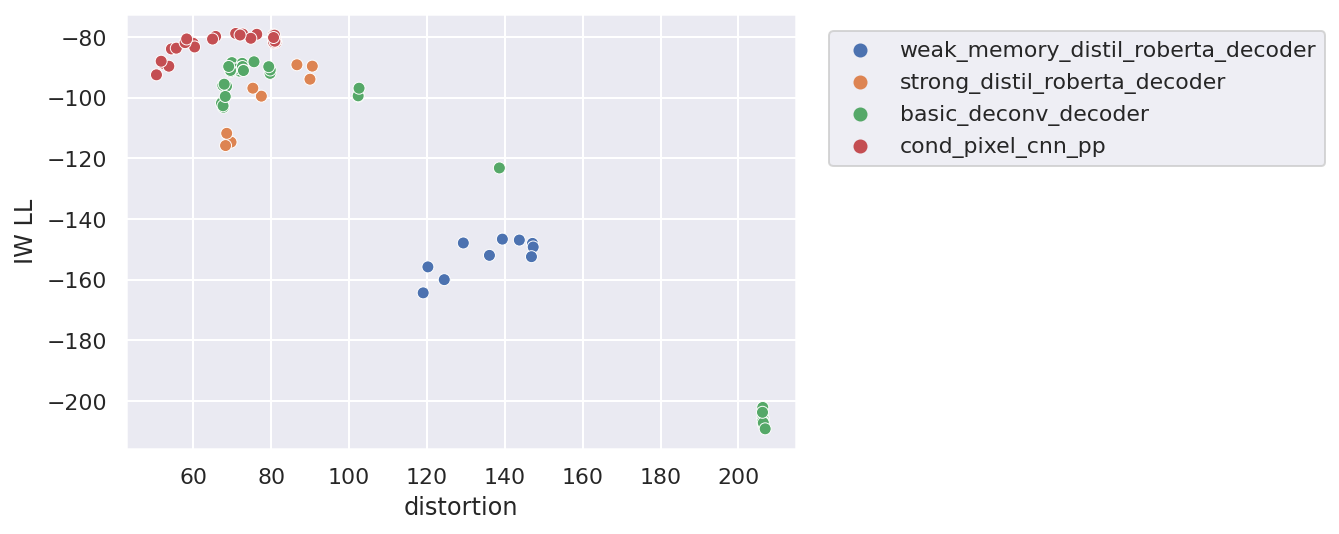

In [9]:
data = results_df[results_df.phase == "valid"]

sns.scatterplot(
    x="distortion", 
    y="IW LL", 
    hue="decoder", 
    data=data) 

plt.legend(loc=(1.05, 0.65))

<AxesSubplot:xlabel='l_mmd', ylabel='MMD'>

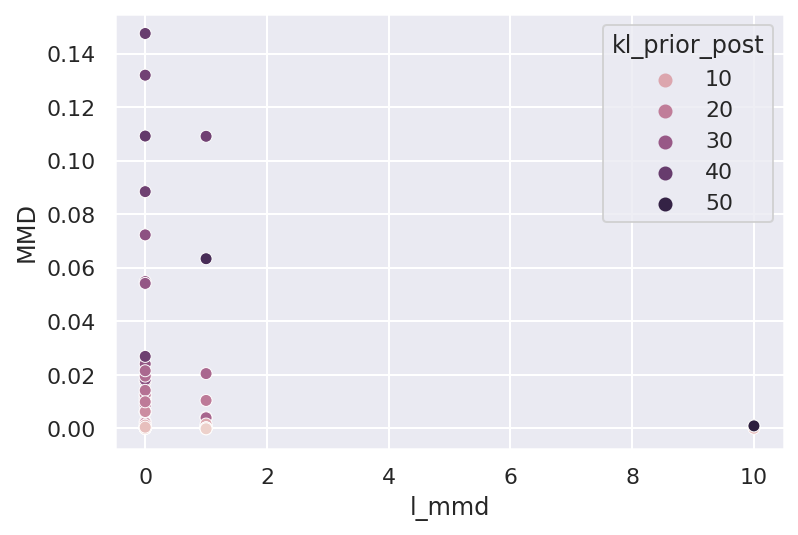

In [16]:
data = results_df[(results_df.phase == "valid") & (results_df.l_mmd < 100)]

sns.scatterplot(
    x="l_mmd", 
    y="MMD", 
    hue="kl_prior_post", 
    data=data) 